# Planejamento Futuro

## Iremos prever o número de passageiro aéreos no futuro.

### Dividiremos de forma adequada a base de dados e construiremos uma rede neural capaz de realizar previsões. 

In [16]:
#importando a base de dados e as bibliotecas para uso
import pandas as pd
import seaborn as sns
import matplotlib as mpl

#setando os parametros para os gráficos do matplotlib
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

passageiros = pd.read_csv('Passageiros.csv')

In [17]:
#visualizando a serie temporal
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

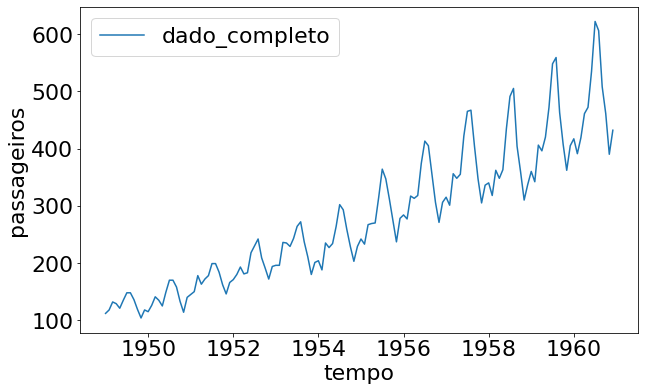

In [18]:
#plotando os dados de serie temporal
sns.lineplot(x='tempo', y='passageiros', data=passageiros,label='dado_completo')

In [19]:
#precisamos escalar os dados, converter os dados proximos a 0 para um melhor intendimento e processamento da rede neural
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [20]:
#ajustando os dados para o StandardScaler entender como os dados estão expostos
sc.fit(passageiros)

StandardScaler()

In [21]:
#dados escalados
dado_escalado = sc.transform(passageiros)

In [22]:
#passando para as variáveis x e y os dados da primeira e segunda coluna transformados.
x = dado_escalado[:,0]
y = dado_escalado[:,1]

<AxesSubplot:>

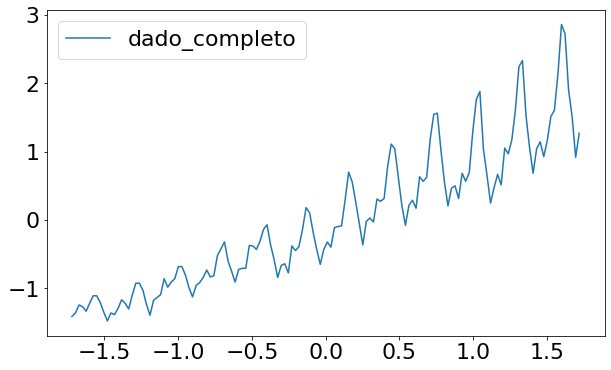

In [24]:
#plotando os dados transformados.
sns.lineplot(x=x, y=y, data=passageiros,label='dado_completo')

Text(0.5, 0, 'Tempo')

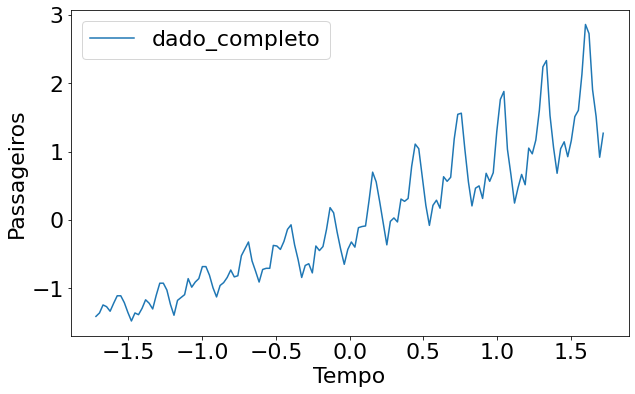

In [25]:
#adicionando legendas no gráfico
import matplotlib.pyplot as plt

sns.lineplot(x=x, y=y, data=passageiros,label='dado_completo')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [27]:
#dividindo os dados em treino e teste

#setando 90% dos dados para treino e 10% para teste
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

In [31]:
#dividindo o dados para variáveis x e y treino

xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [32]:
#dividindo o dados para variáveis x e y teste
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Tempo')

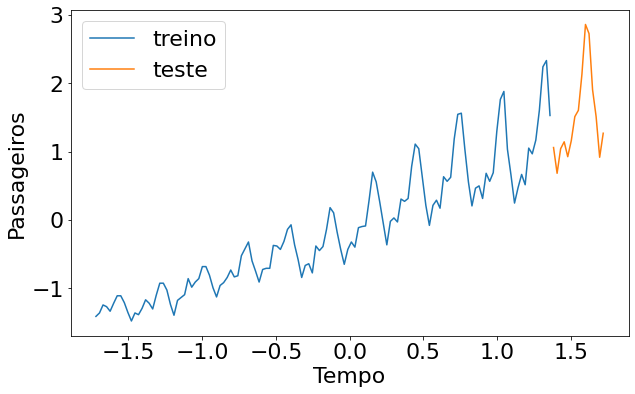

In [37]:
#plotando os dados de treino
sns.lineplot(x=xtreino, y=ytreino,label='treino')
#plotando os dados de teste
sns.lineplot(x=xteste, y=yteste,label='teste')

plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [60]:
#utilizamos uma rede neural em conjuto com uma regressão linear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

regressor = Sequential()

## Criação da sequencia de camada da rede neural

In [61]:
#inicializando a rede neural com a entrada dos dados
#passamos os pesos e os vieses para a rede neural
regressor.add(Dense(1,input_dim=1, kernel_initializer='Ones', 
                    activation = 'linear',use_bias=False))

In [62]:
#compiltando a estrutura da rede, erro medio quadratico, junto com o adam, otimizador de pesos
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [63]:
#resumo da rede neural

regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [64]:
#refinando os parâmetros com base nos dados de treino, ou seja, encontraremos as melhores combinações
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 2s 7ms/step - loss: 0.1286


In [65]:
#visualizando a estimativa de treino

y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 7ms/step


Text(0.5, 0, 'Tempo')

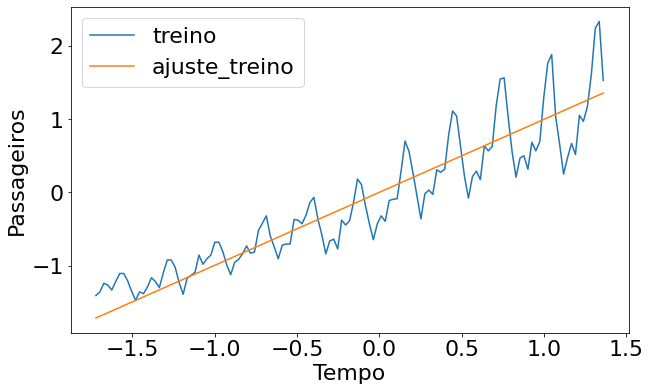

In [67]:
#plotando os resultados
sns.lineplot(x=xtreino, y=ytreino,label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [69]:
#voltaremos os dados para visualizar a quantidade de passageiros
#criaremos um data frame para visualizar os dados.

d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}


In [70]:
resultados = pd.DataFrame(data=d)

In [71]:
resultados

,tempo,passageiros
0,-1.720064,-1.713777
1,-1.696007,-1.689808
2,-1.671950,-1.665840
3,-1.647894,-1.641871
4,-1.623837,-1.617902
...,...,...
124,1.262984,1.258368
125,1.287041,1.282337
126,1.311098,1.306306
127,1.335155,1.330275


In [72]:
#transformação inversa para visualizar os dados

resultado_transf = sc.inverse_transform(resultados)

In [74]:
#alocando os dados no dataframe
resultado_transf = pd.DataFrame(resultado_transf)

In [76]:
#nomeando as colunas do dataframe
resultado_transf.columns = ['tempo', 'passageiros']

In [77]:
resultado_transf

,tempo,passageiros
0,1949.000000,75.418163
1,1949.083333,78.283626
2,1949.166667,81.149089
3,1949.250000,84.014538
4,1949.333333,86.880016
...,...,...
124,1959.333333,430.735301
125,1959.416667,433.600764
126,1959.500000,436.466228
127,1959.583333,439.331677


Text(0.5, 0, 'Tempo')

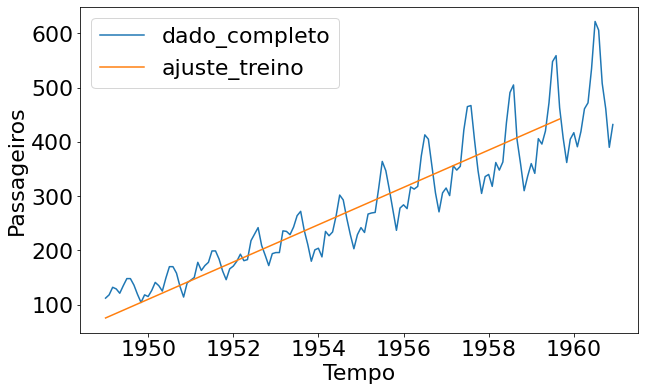

In [80]:
#plotando os dados
sns.lineplot(x='tempo', y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo', y='passageiros',data=resultado_transf,label='ajuste_treino')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [84]:
#variavel temporária para os dados de testes
y_predict_teste = regressor.predict(xteste)

1/1 [==============================] - 0s 37ms/step


In [85]:
#adicionando no dataframe
d = {'tempo':xteste, 'passageiros': y_predict_teste[:,0]}
resultado_teste = pd.DataFrame(data=d)

In [86]:
#transformação inversa para visualizar
resultado_transf_teste = sc.inverse_transform(resultado_teste)

In [87]:
#adicionando no dataframe os dados invertidos
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [88]:
#nomeando as colunas do dataframe
resultado_transf_teste.columns = ['tempo', 'passageiros']

In [ ]:
#plotando os dados
sns.lineplot(x='tempo', y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo', y='passageiros',data=resultado_transf,label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros',data=resultado_transf_teste,label='previsão')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

Text(0.5, 0, 'Tempo')